In [149]:
# Checkout www.pygimli.org for more examples
%matplotlib inline
import inspect














VES inversion for a blocky model
================================

This tutorial shows how an built-in forward operator is used for inversion.
A DC 1D (VES) modelling is used to generate data, noisify and invert them.


We import numpy, matplotlib and the 1D plotting function



In [150]:
import numpy as np
import matplotlib.pyplot as plt

import pygimli as pg
from pygimli.viewer.mpl import drawModel1D

some definitions before (model, data and error)



In [179]:
nlay = 3  # number of layers
synres = [500., 800.,300]# synthetic resistivity
synthk = [1.0,8]  # synthetic thickness (nlay-th layer is infinite)
ab2 = np.logspace(-1, 2, 20)  # AB/2 distance (current electrodes)
mn2 = ab2/2   # MN/2 distance (potential electrodes)

initialize the forward modelling operator



In [180]:
f = pg.core.DC1dModelling(nlay, ab2, mn2)
rhoa1 = f(synthk+synres)

In [186]:
nlay2 = 3  # number of layers
synres2 = [500.,900., 300.]# synthetic resistivity
synthk2 = [1., 5.0]  # synthetic thickness (nlay-th layer is infinite)
ab22 = np.logspace(-1, 2, 20)  # AB/2 distance (current electrodes)
mn22 = ab2/2   # MN/2 distance (potential electrodes)
f2 = pg.core.DC1dModelling(nlay2, ab22, mn22)
rhoa2 = f2(synthk2+synres2)

the forward operator can be called by f.response(model) or simply f(model)



In [187]:
print(synthk2)

[1.0, 5.0]


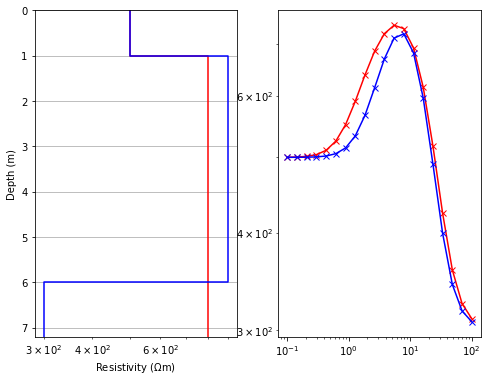

In [188]:

fig, ax = plt.subplots(ncols=2, figsize=(8, 6))  # two-column figure
drawModel1D(ax[0], synthk, synres, plot='semilogx', color='r')
drawModel1D(ax[0], synthk2, synres2, plot='semilogx', color='b')
ax[1].loglog(ab2,rhoa, 'rx-', label='data')  # sounding curve
ax[1].loglog(ab2,rhoa2, 'bx-', label='data')  # sounding curve

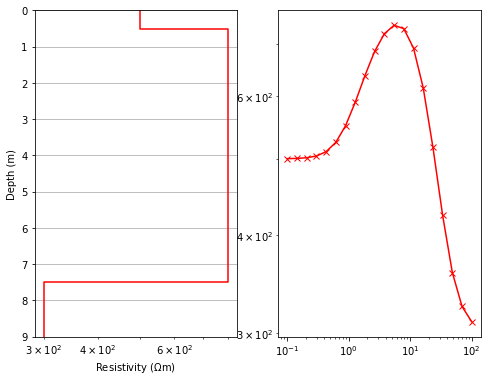

In [156]:
rhoa = f2(synthk+synres)
fig, ax = plt.subplots(ncols=2, figsize=(8, 6))  # two-column figure
drawModel1D(ax[0], synthk, synres, plot='semilogx', color='r')
ax[1].loglog(ab2,rhoa, 'rx-', label='data')  # sounding curve